In [20]:
! pip install notebook pandas matplotlib scikit-learn


In [21]:
# Creating a small data set 

import pandas as pd
data = {
    "game_name": [
"Counter-Strike: Global Offensive",
"Dota 2",
"Cyberpunk 2077",
"Stardew Valley",

"The Witcher 3: Wild Hunt",
"Among Us",
"PUBG: Battlegrounds",
"Hades",
"Elden Ring",
"Fall Guys"
],
"genre": [
"Shooter",
"MOBA",
"RPG",
"Simulation",
"RPG",
"Party",
"Shooter",
"Roguelike",
"RPG",
"Party"
],
"price": [0, 0, 59.99, 14.99, 39.99, 4.99, 29.99,
24.99, 59.99, 19.99],
"metacritic_score": [83, 90, 78, 89, 93, 85, 86, 92,
94, 80],
"player_count": [1000000, 900000, 500000, 300000,
700000, 800000, 600000, 200000, 750000, 400000]
}

df = pd.DataFrame(data)
df.head()



,game_name,genre,price,metacritic_score,player_count
0,Counter-Strike: Global Offensive,Shooter,0.00,83,1000000
1,Dota 2,MOBA,0.00,90,900000
2,Cyberpunk 2077,RPG,59.99,78,500000
3,Stardew Valley,Simulation,14.99,89,300000
4,The Witcher 3: Wild Hunt,RPG,39.99,93,700000


In [22]:
# checking descriptive stats 
print(df.shape)
print(df.describe())
print(df['genre'].unique())


(10, 5)
           price  metacritic_score   player_count
count  10.000000         10.000000       10.00000
mean   25.492000         87.000000   615000.00000
std    22.289709          5.517648   262519.84052
min     0.000000         78.000000   200000.00000
25%     7.490000         83.500000   425000.00000
50%    22.490000         87.500000   650000.00000
75%    37.490000         91.500000   787500.00000
max    59.990000         94.000000  1000000.00000
['Shooter' 'MOBA' 'RPG' 'Simulation' 'Party' 'Roguelike']


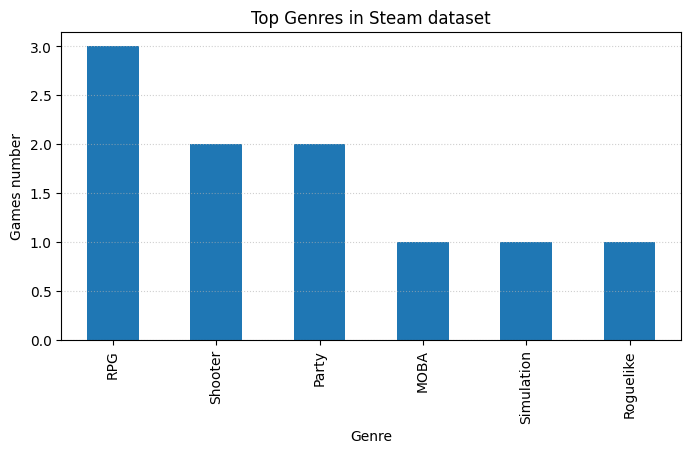

In [23]:
# creating visualization to see which genres are most predominant 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
df['genre'].value_counts().plot(kind='bar')
plt.title('Top Genres in Steam dataset')
plt.xlabel('Genre')
plt.ylabel('Games number')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

In [24]:
# Building linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
# preparing x and y dimensions 
X = df[['price']].fillna(0)
y = df['metacritic_score']

# train/test separation
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.2, random_state=42)

In [26]:

# training
model = LinearRegression()
model.fit(X_train, y_train)

# valuing 
score = model.score(X_test, y_test)
print(f"R^2 during the test: {score:.3f}")


R^2 during the test: -11.465


In [27]:
# forecast
pred = model.predict(np.array([[40.0]]))
print(f"Forecasted Metacritic score for price 40$ is {pred[0]:.2f}")

Forecasted Metacritic score for price 40$ is 85.27


/Users/tsh/Desktop/Python test/.conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Feature engineering
X = df[['price', 'player_count']].copy()
X['player_count'] = X['player_count'] / 1_000_000
genre_dummies = pd.get_dummies(df['genre'],
prefix='genre')
X = pd.concat([X, genre_dummies], axis=1)
y = df['metacritic_score']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("R^2 after feature engineering is", model.score(X_test,y_test))

R^2 after feature engineering is -18.67656639240556


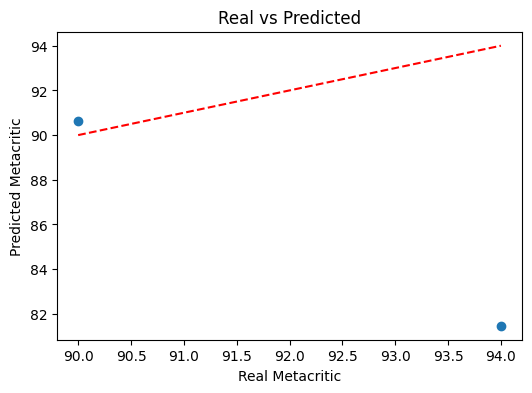

In [32]:
import numpy as np
y_pred = model.predict(X_test)
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(),
y_test.max()], 'r--')
plt.xlabel('Real Metacritic')
plt.ylabel('Predicted Metacritic')
plt.title('Real vs Predicted')
plt.show()

In [ ]:
## End